<a href="https://www.kaggle.com/code/aravindpiratla/capstone-project-cv?scriptVersionId=118191090" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# importing the zipfile module
from zipfile import ZipFile
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

###CNN Dependencies
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
import cv2
from matplotlib import pyplot as plt
  

from keras.preprocessing.image import ImageDataGenerator

In [2]:
ROOT_PATH = '../input/stanford-car-dataset-images-in-224x224/stanford-car-dataset-by-classes-folder-224/'
TEST_ANNOTATIONS_PATH = ROOT_PATH+'anno_test.csv'
TRAIN_ANNOTATIONS_PATH = ROOT_PATH+'anno_train.csv'
NAMES_PATH= ROOT_PATH+'names.csv'

In [3]:
colnames=['name', 'x1', 'x2', 'y1', 'y2', 'image_class']

In [4]:
test_annotations = pd.read_csv(TEST_ANNOTATIONS_PATH, header=None, names=colnames)
train_annotations = pd.read_csv(TRAIN_ANNOTATIONS_PATH, header=None, names=colnames)


In [5]:
test_annotations.head()

,name,x1,x2,y1,y2,image_class
0,00001.jpg,30,52,246,147,181
1,00002.jpg,100,19,576,203,103
2,00003.jpg,51,105,968,659,145
3,00004.jpg,67,84,581,407,187
4,00005.jpg,140,151,593,339,185


In [6]:
train_annotations.shape

(8144, 6)

In [7]:
test_annotations.shape

(8041, 6)

In [8]:
test_annotations.describe()

,x1,x2,y1,y2,image_class
count,8041.000000,8041.000000,8041.000000,8041.000000,8041.000000
mean,65.057456,107.816192,639.433777,417.301828,98.975501
std,82.336438,108.052354,411.632197,274.659479,56.505578
min,1.000000,1.000000,72.000000,41.000000,1.000000
25%,19.000000,40.000000,395.000000,249.000000,51.000000
50%,39.000000,79.000000,575.000000,364.000000,99.000000
75%,78.000000,137.000000,748.000000,478.000000,148.000000
max,1048.000000,1651.000000,7224.000000,3835.000000,196.000000


In [9]:
test_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         8041 non-null   object
 1   x1           8041 non-null   int64 
 2   x2           8041 non-null   int64 
 3   y1           8041 non-null   int64 
 4   y2           8041 non-null   int64 
 5   image_class  8041 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 377.0+ KB


In [10]:
test_annotations.isnull().any()

name           False
x1             False
x2             False
y1             False
y2             False
image_class    False
dtype: bool

In [11]:
col_names = ['car_models']
names_df = pd.read_csv(NAMES_PATH, header=None, names = col_names)
nRow, nCol = names_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 196 rows and 1 columns


In [12]:
names_df.head(10)
names_df.index += 1 
names_df[:10]


,car_models
1,AM General Hummer SUV 2000
2,Acura RL Sedan 2012
3,Acura TL Sedan 2012
4,Acura TL Type-S 2008
5,Acura TSX Sedan 2012
6,Acura Integra Type R 2001
7,Acura ZDX Hatchback 2012
8,Aston Martin V8 Vantage Convertible 2012
9,Aston Martin V8 Vantage Coupe 2012
10,Aston Martin Virage Convertible 2012


In [13]:
import os

DATA_DIR_TRAIN = ROOT_PATH+'car_data/train/'
train_classes = os.listdir(DATA_DIR_TRAIN)

DATA_DIR_TEST = ROOT_PATH+'car_data/test/'
test_classes = os.listdir(DATA_DIR_TEST)

train_classes[:5]

['Dodge Ram Pickup 3500 Crew Cab 2010',
 'Cadillac CTS-V Sedan 2012',
 'Audi S5 Convertible 2012',
 'Ram C-V Cargo Van Minivan 2012',
 'smart fortwo Convertible 2012']

### Let's Map class to the car models

In [14]:
# train_annotations['model'] = train_annotations
def get_car_model(row):
    class_num = row['image_class']
    if class_num >= 0 :
        return names_df.iloc[class_num-1][0]


### Creating mapping between classes and Models

In [15]:
test_annotations['car_model'] = test_annotations.apply(lambda row: get_car_model(row), axis=1)

In [16]:
test_annotations.head()

,name,x1,x2,y1,y2,image_class,car_model
0,00001.jpg,30,52,246,147,181,Suzuki Aerio Sedan 2007
1,00002.jpg,100,19,576,203,103,Ferrari 458 Italia Convertible 2012
2,00003.jpg,51,105,968,659,145,Jeep Patriot SUV 2012
3,00004.jpg,67,84,581,407,187,Toyota Camry Sedan 2012
4,00005.jpg,140,151,593,339,185,Tesla Model S Sedan 2012


In [17]:
train_annotations['car_model'] = train_annotations.apply(lambda row: get_car_model(row), axis=1)
train_annotations.head()

,name,x1,x2,y1,y2,image_class,car_model
0,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012
1,00002.jpg,36,116,868,587,3,Acura TL Sedan 2012
2,00003.jpg,85,109,601,381,91,Dodge Dakota Club Cab 2007
3,00004.jpg,621,393,1484,1096,134,Hyundai Sonata Hybrid Sedan 2012
4,00005.jpg,14,36,133,99,106,Ford F-450 Super Duty Crew Cab 2012


In [18]:
train_annotations.head()

,name,x1,x2,y1,y2,image_class,car_model
0,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012
1,00002.jpg,36,116,868,587,3,Acura TL Sedan 2012
2,00003.jpg,85,109,601,381,91,Dodge Dakota Club Cab 2007
3,00004.jpg,621,393,1484,1096,134,Hyundai Sonata Hybrid Sedan 2012
4,00005.jpg,14,36,133,99,106,Ford F-450 Super Duty Crew Cab 2012


### EDI on the data

In [19]:
### Doing a null Check on the data
train_annotations['car_model'].isnull().any()

False

In [20]:
# Function which returns last word
def lastWord(row):
    string = row['car_model']
    # split by space and converting
    # string to list and
    lis = list(string.split(" "))
     
    # length of list
    length = len(lis)
     
    # returning last element in list
    return lis[length-1]

In [21]:
# Function which returns first word
def firstWord(row):
    string = row['car_model']
    # split by space and converting
    # string to list and
    lis = list(string.split(" "))
     
    # length of list
    length = len(lis)
     
    # returning first element in list
    return lis[0]

In [22]:
train_annotations['year_of_maufacture'] = train_annotations.apply(lambda row: lastWord(row), axis = 1)
train_annotations['manufacturer'] = train_annotations.apply(lambda row: firstWord(row), axis = 1)

In [23]:
train_annotations['year_of_maufacture'].value_counts()

2012    4818
2007    1059
2009     540
2010     413
2011     312
2008     283
1993     139
1994     128
1998      92
2001      90
1991      46
2006      46
2000      45
2002      45
1997      44
1999      44
Name: year_of_maufacture, dtype: int64

<AxesSubplot:>

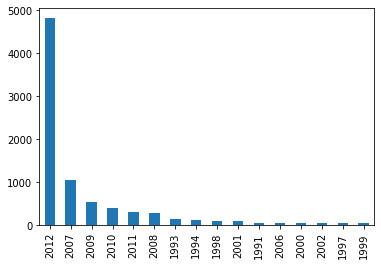

In [24]:
train_annotations['year_of_maufacture'].value_counts().plot(kind='bar')

In [25]:
train_annotations['manufacturer'].value_counts()

Chevrolet        905
Dodge            630
Audi             589
BMW              531
Ford             521
Hyundai          438
Mercedes-Benz    261
Chrysler         260
Acura            242
GMC              238
Bentley          238
Jeep             220
Nissan           171
Toyota           168
Suzuki           167
Ferrari          164
Honda            161
Lamborghini      161
Buick            158
Aston            157
Volkswagen       132
Volvo            131
Cadillac         129
Rolls-Royce      114
Spyker            88
Land              86
HUMMER            83
Bugatti           77
Infiniti          67
FIAT              62
Mitsubishi        48
Jaguar            47
Eagle             46
Daewoo            45
Geo               45
AM                45
McLaren           44
Porsche           44
Fisker            44
Plymouth          44
Scion             42
Ram               41
smart             40
Isuzu             40
Tesla             39
Lincoln           39
MINI              37
Mazda        

In [26]:
unique_brands = train_annotations['manufacturer'].unique().size


<b> There are totally 49 unique brands </b>

<AxesSubplot:>

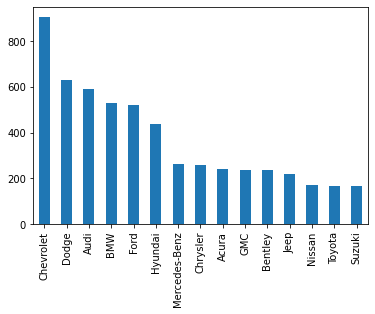

In [27]:
train_annotations['manufacturer'].value_counts()[:15].plot(kind = 'bar')

<p> Majority of the cars are from year 2012 </p>

In [28]:
### Display image
def display_image(num):
    sample_image = Image.open('./'+DATA_DIR_TRAIN+train_annotations['car_model'][num]+'/'+train_annotations['name'][num])
    return sample_image

In [29]:
def display_multiple_images():
    random_numbers = [4, 10, 27, 140]
    # setting values to rows and column variables
    rows = 2
    columns = 2
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    for i in range(len(random_numbers)):
        num = random_numbers[i]
        img = display_image(num)
        plt.subplot(rows, columns, i+1)
        plt.imshow(img)

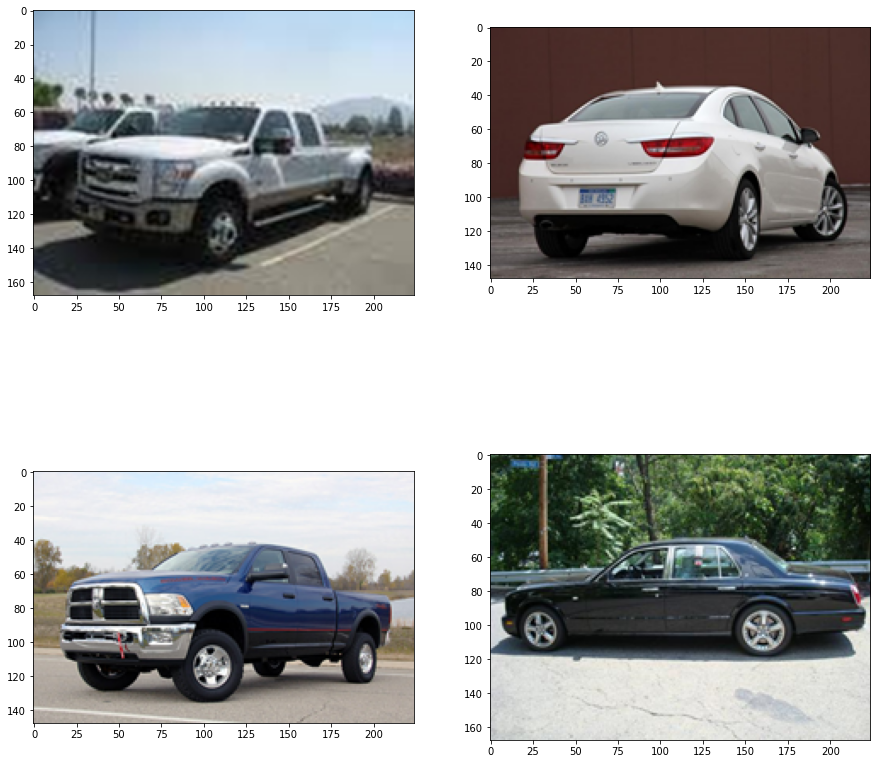

In [30]:
display_multiple_images()

### Display an image - 4

In [31]:
def display_with_box(num):
    img = Image.open('./'+DATA_DIR_TRAIN+train_annotations['car_model'][num]+'/'+train_annotations['name'][num])
    img_bbox = ImageDraw.Draw(img)
    label = names_df.iloc[num-1][0]
    print(label)
    img_bbox.text((300, 400), label, align ="center", fill= 'white') ### Proper Name
    cord = [train_annotations['x1'][num],train_annotations['x2'][num],
                      train_annotations['y1'][num],train_annotations['y2'][num]]
    img_bbox.rectangle(cord, outline="blue",width=3)
    return img

Cadillac CTS-V Sedan 2012


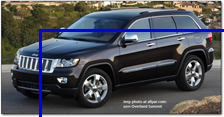

In [32]:
display_with_box(51)

Acura TSX Sedan 2012


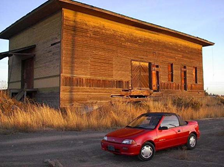

In [33]:
display_with_box(5)

### Design a CNN model to detect a car

In [34]:
def get_base_model():
    cnn = Sequential()
    #Adding 1st Convolution and Pooling Layer
    cnn.add(Conv2D(50,kernel_size=(5,5),input_shape=(128,128,3),activation='relu'))
    cnn.add(MaxPool2D(pool_size=(2,2)))
    cnn.add(Dropout(0.2))
    #Adding 2nd Convolution and Pooling Layer
    cnn.add(Conv2D(75,kernel_size=(5,5),strides=(1, 1),activation='relu',padding='same'))
    cnn.add(MaxPool2D(pool_size=(2,2)))
    cnn.add(Dropout(0.2))
    #Adding 3rd Convolution and Pooling Layer
    cnn.add(Conv2D(125,kernel_size=(5,5),strides=(2, 2),activation='relu',padding='same'))
    cnn.add(MaxPool2D(pool_size=(2,2)))
    cnn.add(Dropout(0.2))
    #Adding 4th Convolution and Pooling Layer
    cnn.add(Conv2D(256,kernel_size=(5,5),strides=(2, 2),activation='relu',padding='same'))
    cnn.add(MaxPool2D(pool_size=(2,2)))
    cnn.add(Dropout(0.2))
    #Adding 5th Convolution and Pooling Layer
    cnn.add(Conv2D(256,kernel_size=(5,5),activation='relu',padding='same'))
    cnn.add(MaxPool2D(pool_size=(2,2)))
    cnn.add(Dropout(0.2))

    #Flatten
    cnn.add(Flatten())

    #Adding Input and Output Layer
    cnn.add(Dense(units=500,activation='relu'))
    cnn.add(Dense(units=256,activation='relu'))
    cnn.add(Dense(units=256,activation='relu'))
    cnn.add(Dense(units=196,activation='sigmoid'))
    cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return cnn

### Rescaling the data

In [35]:
### Data Agumentation for Train Data
train_data_aug = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data = ImageDataGenerator(rescale=1./255)


In [36]:
#Data agumentation

train_data = train_data_aug.flow_from_directory(DATA_DIR_TRAIN,
                                              target_size=(128,128),
                                              batch_size=32,
                                              class_mode='categorical')
test_data = test_data.flow_from_directory(DATA_DIR_TEST,
                                              target_size=(128,128),
                                              batch_size=32,
                                              class_mode='categorical')

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [37]:
history = get_base_model().fit_generator(train_data,
                            epochs=10,
                            validation_data=test_data,
                            validation_steps=50)

2023-02-04 10:48:02.955621: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2023-02-04 10:48:03.668595: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
255/255 [==============================] - 352s 1s/step - loss: 5.2796 - accuracy: 0.0055 - val_loss: 5.2773 - val_accuracy: 0.0056
Epoch 2/10
255/255 [==============================] - 342s 1s/step - loss: 5.2778 - accuracy: 0.0083 - val_loss: 5.2759 - val_accuracy: 0.0063
Epoch 3/10
255/255 [==============================] - 343s 1s/step - loss: 5.2772 - accuracy: 0.0083 - val_loss: 5.2756 - val_accuracy: 0.0075
Epoch 4/10
255/255 [==============================] - 343s 1s/step - loss: 5.2763 - accuracy: 0.0083 - val_loss: 5.2748 - val_accuracy: 0.0094
Epoch 5/10
255/255 [==============================] - 343s 1s/step - loss: 5.2758 - accuracy: 0.0083 - val_loss: 5.2719 - val_accuracy: 0.0131
Epoch 6/10
255/255 [==============================] - 343s 1s/step - loss: 5.2755 - accuracy: 0.0083 - val_loss: 5.2730 - val_accuracy: 0.0056
Epoch 7/10
255/255 [==============================] - 343s 1s/step - loss: 5.2752 - accuracy: 0.0083 - val_loss: 5.2725 - val_accuracy: 0.0088

### Performance Evaluation

In [38]:
def performance_metrics(model, epochs = 10):
    data = pd.DataFrame.from_dict(model.history)
    data = pd.concat([pd.Series(range(0,epochs),name='epochs'),data],axis=1)
    return data.head()

In [39]:
performance_metrics(history)

,epochs,loss,accuracy,val_loss,val_accuracy
0,0,5.279599,0.005526,5.277294,0.005625
1,1,5.277809,0.008350,5.275889,0.006250
2,2,5.277153,0.008350,5.275596,0.007500
3,3,5.276345,0.008350,5.274842,0.009375
4,4,5.275772,0.008350,5.271908,0.013125
